In [2]:
from util.db_util import Database
from util.const_util import CONST
import pandas as pd

In [6]:
db = Database(CONST.DB_PATH)

results_df = pd.DataFrame(columns=["Year", "Gender", "Event", "Avg"])

top = 40

for gender in CONST.GENDER.ALL:

    for event in CONST.EVENT.ALL_TRACK:

        for year in [2023, 2024, 2025]:
            meet_id = db.get_meet_id(CONST.MEET_TYPE.STATE, 1, year, gender)
            
            result_type = CONST.RESULT_TYPE.FINAL

            if event in CONST.EVENT.ALL_PRELIM:
                result_type = CONST.RESULT_TYPE.PRELIM

            df = db.get_top_results_from_meet(top, meet_id, result_type)
        
            filtered_df = df[df['event'] == event]
        
            avg = filtered_df["result2"].mean()
    
            results_df.loc[len(results_df)] = [year, gender, event, avg]


print(results_df)

    Year Gender        Event         Avg
0   2023   Boys   100 Meters   10.980909
1   2024   Boys   100 Meters   11.295484
2   2025   Boys   100 Meters   10.887429
3   2023   Boys   200 Meters   22.145862
4   2024   Boys   200 Meters   22.892222
5   2025   Boys   200 Meters   21.894643
6   2023   Boys   400 Meters   49.273077
7   2024   Boys   400 Meters   49.946667
8   2025   Boys   400 Meters   49.208148
9   2023   Boys   800 Meters  115.920000
10  2024   Boys   800 Meters  118.154074
11  2025   Boys   800 Meters  115.795556
12  2023   Boys  1600 Meters  260.066538
13  2024   Boys  1600 Meters  262.439615
14  2025   Boys  1600 Meters  258.050370
15  2023   Boys  3200 Meters  563.520000
16  2024   Boys  3200 Meters  561.555556
17  2025   Boys  3200 Meters  559.319259
18  2023  Girls   100 Meters   12.271154
19  2024  Girls   100 Meters   12.497407
20  2025  Girls   100 Meters   12.330000
21  2023  Girls   200 Meters   25.458000
22  2024  Girls   200 Meters   25.731111
23  2025  Girls 

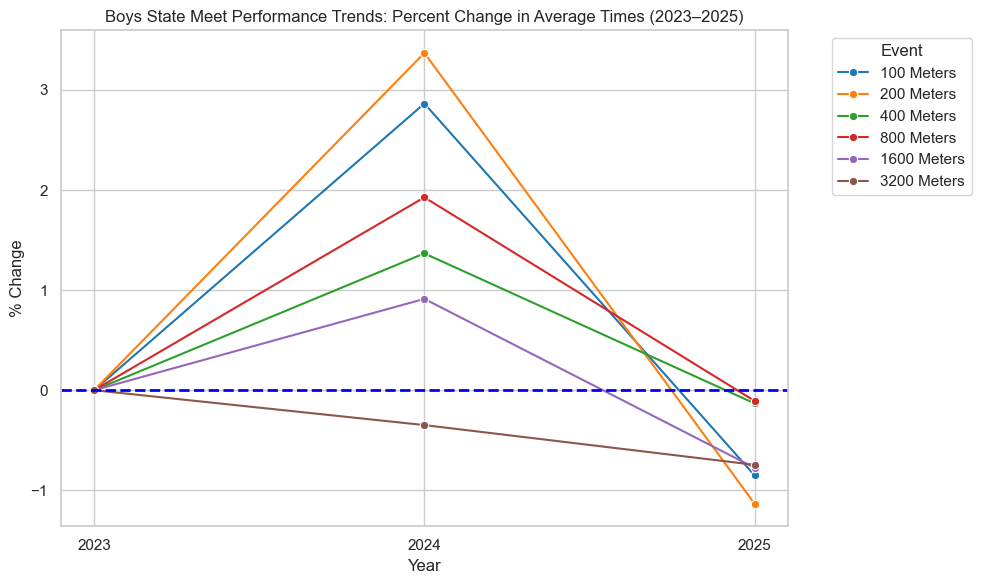

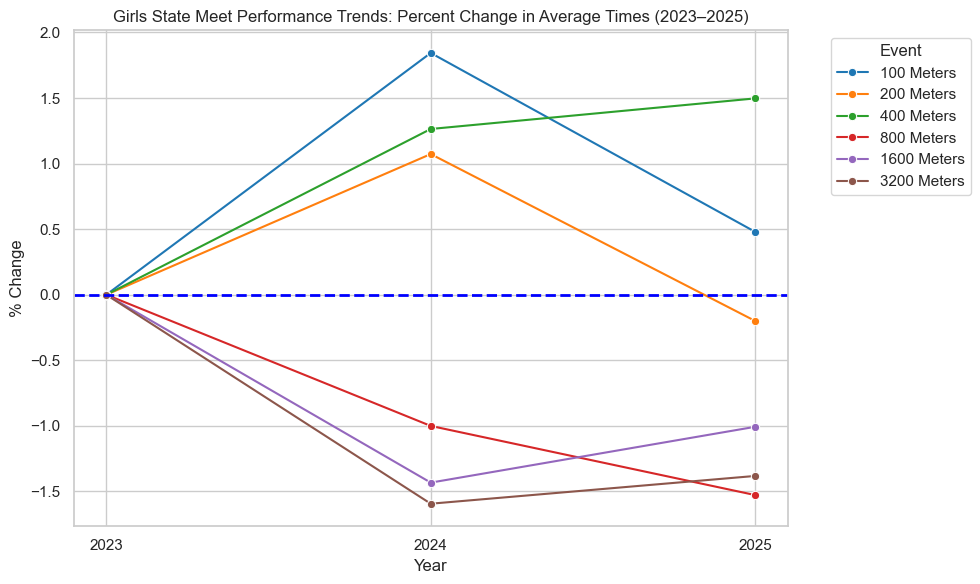

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate percent change relative to 2023
def calculate_percent_change(df):
    base_year = 2023
    pct_df = []

    # Group by Gender and Event
    for (gender, event), group in df.groupby(["Gender", "Event"]):
        group = group.sort_values("Year")
        base_avg = group[group["Year"] == base_year]["Avg"].values[0]

        group = group.copy()
        group["Percent Change"] = ((group["Avg"] - base_avg) / base_avg) * 100

        pct_df.append(group)

    return pd.concat(pct_df, ignore_index=True)

# Apply transformation
df_pct = calculate_percent_change(results_df)

# Define the desired event order
event_order = [
    "100 Meters",
    "200 Meters",
    "400 Meters",
    "800 Meters",
    "1600 Meters",
    "3200 Meters"
]

# Apply the order to the categorical column
df_pct["Event"] = pd.Categorical(df_pct["Event"], categories=event_order, ordered=True)

# Plot one chart per gender
sns.set(style="whitegrid")

for gender in df_pct["Gender"].unique():
    gender_df = df_pct[df_pct["Gender"] == gender] 

    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=gender_df,
        x="Year", y="Percent Change",
        hue="Event", marker="o", palette="tab10"
    )

    plt.title(f"{gender} State Meet Performance Trends: Percent Change in Average Times (2023–2025)")
    plt.axhline(0, color="blue", linestyle="--", linewidth=2)
    plt.ylabel("% Change")
    plt.xlabel("Year")
    plt.xticks([2023, 2024, 2025])
    plt.legend(title="Event", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
